## Data exploration

In [1]:
import numpy as np
import pandas as pd

with np.load('cifar4-train.npz', allow_pickle = False) as npz_file:
    cifar4_data = dict(npz_file.items())
    
print(list(cifar4_data.keys()))

['pixels', 'overfeat', 'labels', 'names', 'allow_pickle']


In [2]:
X_p = cifar4_data['pixels']
X_o = cifar4_data['overfeat']
y = cifar4_data['labels']
names = cifar4_data['names']

print('X_p:', X_p.shape, X_p.dtype)
print('X_o:', X_o.shape, X_o.dtype)
print('y:', y.shape, y.dtype)
print('names:', names)

X_p: (5000, 3072) uint8
X_o: (5000, 4096) float32
y: (5000,) int64
names: ['truck' 'car' 'airplane' 'ship']


In [3]:
# Print class distribution
pd.value_counts(y, normalize=True)

3    0.25
2    0.25
1    0.25
0    0.25
dtype: float64

In [4]:
#Accuracy of the most-frequent baseline
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_p,y)
accuracy = dummy.score(X_p,y)
print('Accuracy of the most-frequent baseline:',accuracy)


Accuracy of the most-frequent baseline: 0.25


In [5]:
dummy.fit(X_o,y)
accuracy = dummy.score(X_o,y)
print('Accuracy of the most-frequent baseline:',accuracy)

Accuracy of the most-frequent baseline: 0.25


In [6]:
## Plot a few images from the data set
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
trucks = (y == 0)
cars = (y == 1)
airplanes = (y == 2)
ships = (y == 3)


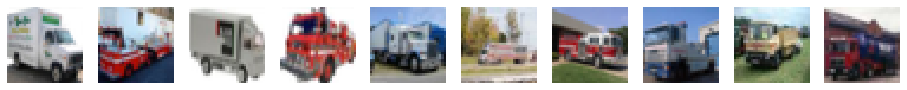

In [7]:
#Trucks
fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(16,4))

for i, axis in enumerate(axes):
                                                     
    flat_img = X_p[trucks][i]
    img = flat_img.reshape(32,32,3)
    
    axis.imshow(img)
    axis.get_xaxis().set_visible(False)
    axis.get_yaxis().set_visible(False)

plt.show()

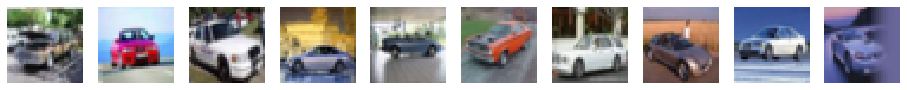

In [8]:
#Cars
fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(16,4))

for i, axis in enumerate(axes):
                                                     
    flat_img = X_p[cars][i]
    img = flat_img.reshape(32,32,3)
    
    axis.imshow(img)
    axis.get_xaxis().set_visible(False)
    axis.get_yaxis().set_visible(False)
    
plt.show()


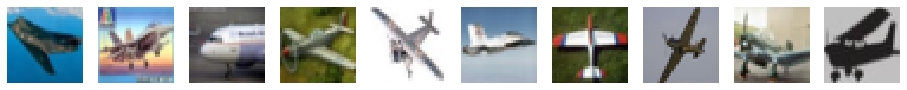

In [9]:
#Airplanes
fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(16,4))

for i, axis in enumerate(axes):
                                                     
    flat_img = X_p[airplanes][i]
    img = flat_img.reshape(32,32,3)
    
    axis.imshow(img)
    axis.get_xaxis().set_visible(False)
    axis.get_yaxis().set_visible(False)
    
plt.show()


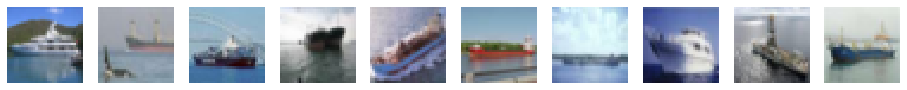

In [10]:
#Ships
fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(16,4))

for i, axis in enumerate(axes):
                                                     
    flat_img = X_p[ships][i]
    img = flat_img.reshape(32,32,3)
    
    axis.imshow(img)
    axis.get_xaxis().set_visible(False)
    axis.get_yaxis().set_visible(False)
    
plt.show()

In [11]:
#Create a scree plot of the OverFeat features

from sklearn.decomposition import PCA

pca = PCA(n_components=None)
pca.fit(X_o)

pve = pca.explained_variance_ratio_
print(pve.shape)

#cumulative variance
cv = np.cumsum(np.round(pve, decimals=4)*100)
print('cumulative variance:',cv)



(4096,)
cumulative variance: [16.779999 24.97     29.73     ... 98.50042  98.50042  98.50042 ]


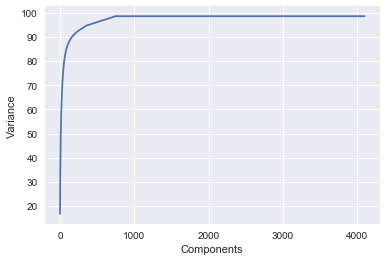

In [12]:
plt.plot(cv)
plt.xlabel('Components')
plt.ylabel('Variance')
plt.show()

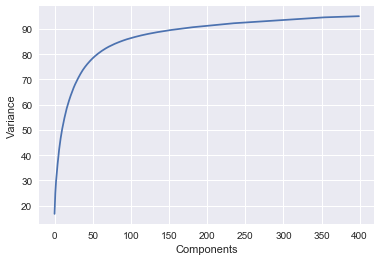

In [13]:
#limit plot to 400 components containing about 95% of cumulated PVE
plt.plot(cv[0:400])
plt.xlabel('Components')
plt.ylabel('Variance')
plt.show()

In [14]:
# What is the cumulated proportion of variance explained (PVE) in the first two components?

# it is 
cv[1]

24.97

In [15]:
#Number of components to keep 80% of the variance explained
cv[0:60]


array([16.779999, 24.97    , 29.73    , 33.36    , 36.5     , 39.5     ,
       42.23    , 44.489998, 46.71    , 48.629997, 50.359997, 51.889996,
       53.399994, 54.799995, 56.109997, 57.359997, 58.6     , 59.66    ,
       60.68    , 61.65    , 62.59    , 63.47    , 64.3     , 65.12    ,
       65.93    , 66.7     , 67.43    , 68.1     , 68.74    , 69.369995,
       69.979996, 70.56    , 71.14    , 71.7     , 72.21999 , 72.73999 ,
       73.23999 , 73.71999 , 74.159996, 74.579994, 74.99    , 75.39    ,
       75.77    , 76.13    , 76.479996, 76.81999 , 77.15999 , 77.48999 ,
       77.80999 , 78.10999 , 78.409996, 78.7     , 78.96999 , 79.23999 ,
       79.49999 , 79.74999 , 79.98999 , 80.22999 , 80.45999 , 80.689995],
      dtype=float32)

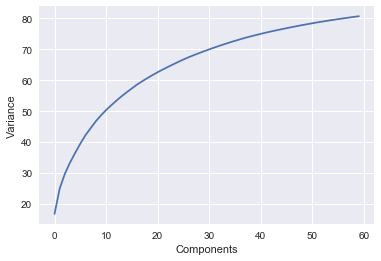

In [16]:
#we have to keep 60 components
plt.plot(cv[0:60])
plt.xlabel('Components')
plt.ylabel('Variance')
plt.show()

In [17]:
#components to keep 90% of the variance explained
cv[0:165]

#we have to keep 165 components

array([16.779999, 24.97    , 29.73    , 33.36    , 36.5     , 39.5     ,
       42.23    , 44.489998, 46.71    , 48.629997, 50.359997, 51.889996,
       53.399994, 54.799995, 56.109997, 57.359997, 58.6     , 59.66    ,
       60.68    , 61.65    , 62.59    , 63.47    , 64.3     , 65.12    ,
       65.93    , 66.7     , 67.43    , 68.1     , 68.74    , 69.369995,
       69.979996, 70.56    , 71.14    , 71.7     , 72.21999 , 72.73999 ,
       73.23999 , 73.71999 , 74.159996, 74.579994, 74.99    , 75.39    ,
       75.77    , 76.13    , 76.479996, 76.81999 , 77.15999 , 77.48999 ,
       77.80999 , 78.10999 , 78.409996, 78.7     , 78.96999 , 79.23999 ,
       79.49999 , 79.74999 , 79.98999 , 80.22999 , 80.45999 , 80.689995,
       80.909996, 81.119995, 81.329994, 81.52999 , 81.72999 , 81.91999 ,
       82.10999 , 82.28999 , 82.46999 , 82.63999 , 82.80999 , 82.96999 ,
       83.119995, 83.27    , 83.42    , 83.57    , 83.72    , 83.86    ,
       84.      , 84.13    , 84.259995, 84.38999 , 

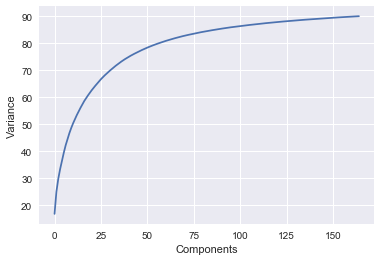

In [18]:
plt.plot(cv[0:165])
plt.xlabel('Components')
plt.ylabel('Variance')
plt.show()


In [19]:
#components to keep 95% of the variance explained
cv[0:400]


array([16.779999, 24.97    , 29.73    , 33.36    , 36.5     , 39.5     ,
       42.23    , 44.489998, 46.71    , 48.629997, 50.359997, 51.889996,
       53.399994, 54.799995, 56.109997, 57.359997, 58.6     , 59.66    ,
       60.68    , 61.65    , 62.59    , 63.47    , 64.3     , 65.12    ,
       65.93    , 66.7     , 67.43    , 68.1     , 68.74    , 69.369995,
       69.979996, 70.56    , 71.14    , 71.7     , 72.21999 , 72.73999 ,
       73.23999 , 73.71999 , 74.159996, 74.579994, 74.99    , 75.39    ,
       75.77    , 76.13    , 76.479996, 76.81999 , 77.15999 , 77.48999 ,
       77.80999 , 78.10999 , 78.409996, 78.7     , 78.96999 , 79.23999 ,
       79.49999 , 79.74999 , 79.98999 , 80.22999 , 80.45999 , 80.689995,
       80.909996, 81.119995, 81.329994, 81.52999 , 81.72999 , 81.91999 ,
       82.10999 , 82.28999 , 82.46999 , 82.63999 , 82.80999 , 82.96999 ,
       83.119995, 83.27    , 83.42    , 83.57    , 83.72    , 83.86    ,
       84.      , 84.13    , 84.259995, 84.38999 , 

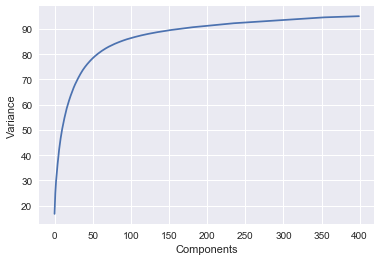

In [20]:
plt.plot(cv[0:400])
plt.xlabel('Components')
plt.ylabel('Variance')
plt.show()

#we have to keep 410 components

In [21]:
#components to keep 95% of the variance explained
cv[0:745]

array([16.779999, 24.97    , 29.73    , 33.36    , 36.5     , 39.5     ,
       42.23    , 44.489998, 46.71    , 48.629997, 50.359997, 51.889996,
       53.399994, 54.799995, 56.109997, 57.359997, 58.6     , 59.66    ,
       60.68    , 61.65    , 62.59    , 63.47    , 64.3     , 65.12    ,
       65.93    , 66.7     , 67.43    , 68.1     , 68.74    , 69.369995,
       69.979996, 70.56    , 71.14    , 71.7     , 72.21999 , 72.73999 ,
       73.23999 , 73.71999 , 74.159996, 74.579994, 74.99    , 75.39    ,
       75.77    , 76.13    , 76.479996, 76.81999 , 77.15999 , 77.48999 ,
       77.80999 , 78.10999 , 78.409996, 78.7     , 78.96999 , 79.23999 ,
       79.49999 , 79.74999 , 79.98999 , 80.22999 , 80.45999 , 80.689995,
       80.909996, 81.119995, 81.329994, 81.52999 , 81.72999 , 81.91999 ,
       82.10999 , 82.28999 , 82.46999 , 82.63999 , 82.80999 , 82.96999 ,
       83.119995, 83.27    , 83.42    , 83.57    , 83.72    , 83.86    ,
       84.      , 84.13    , 84.259995, 84.38999 , 

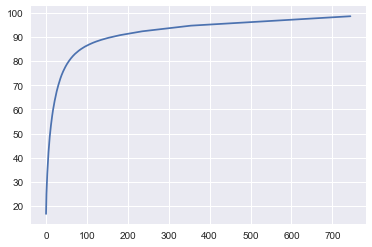

In [22]:
#components to keep 99% of the variance explained
cv[0:745]

plt.plot(cv[0:745])
plt.show()

#we have to keep 745 components

In [23]:
#Create a 2d plot of the OverFeat Features

#Compute 2 principal components
pca2 = PCA(n_components=2)
X_2d = pca2.fit(X_o)


# Compute component scores of 500 images
components = pca2.transform(X_o[:500])
components_label = y[:500]

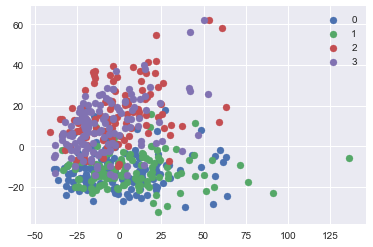

In [24]:
for label in range(4): # 0,1,2,3
    # Images of this digit
    idx = (components_label == label)
    
    # Plot images
    plt.scatter(components[idx, 0], components[idx, 1], label=label)
    plt.legend()
    

###### Observations

We can see that classes are localized quite clearly, alog with this trucks (blue color) and cars (green color) are mixed, as well as airplanes (red) and ships (violet).

In [25]:
#Create a 2d plot using the matrix of image pixels

# Compute component scores of 500 images
X_2d_2 = pca2.fit(X_p)

components_2 = pca2.transform(X_p[:500])

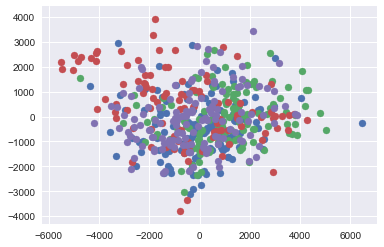

In [26]:
#Create a 2d plot using the matrix of image pixels

for label in range(4): # 0,1,2,3
    # Images of this digit
    idx = (components_label == label)
    
    # Plot images
    plt.scatter(components_2[idx, 0], components_2[idx, 1])
    

###### Observations

Here we can see that all four classes are copletely mixed, it is not possible to distinguish them visually